In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

### 1. Plot the relationship between Age and Wing Length.

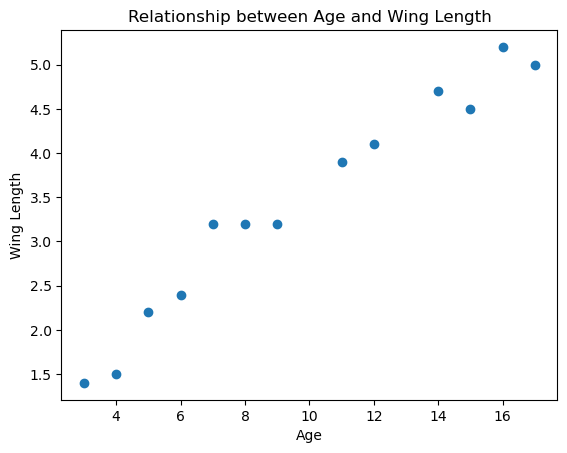

In [8]:
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.2, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

plt.scatter(age, wing_length)
plt.title('Relationship between Age and Wing Length')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.show()

### 2. Calculate and plot the regression line.

slope: 0.26
intercept: 0.85


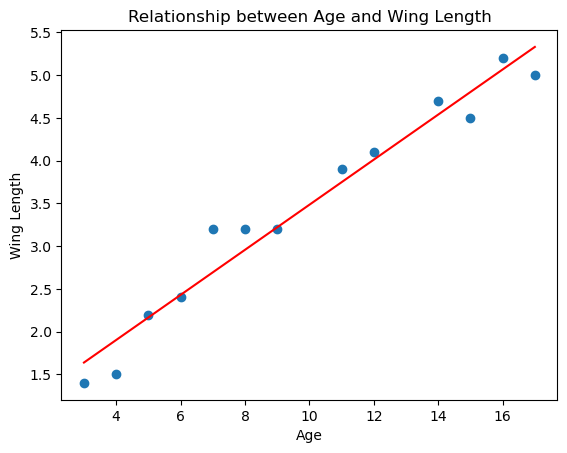

In [45]:
results = st.linregress(age, wing_length)

slope = results.slope
intercept = results.intercept
pvalue = results.pvalue

wing_length_pred = slope*age + intercept

print(f'slope: {slope:.2f}')
print(f'intercept: {intercept:.2f}')

plt.scatter(age, wing_length)
plt.plot(age, wing_length_pred, color = 'r')
plt.title('Relationship between Age and Wing Length')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.show()

### 3. Can you reject H0: b = 0?

In [46]:
if pvalue < 0.05:
    print('reject null hypothesis')
else:
    print('do not reject null hypothesis')

reject null hypothesis


### 4. Calculate and plot the confidence intervals on the slope of the regression.

0.17818931522538525


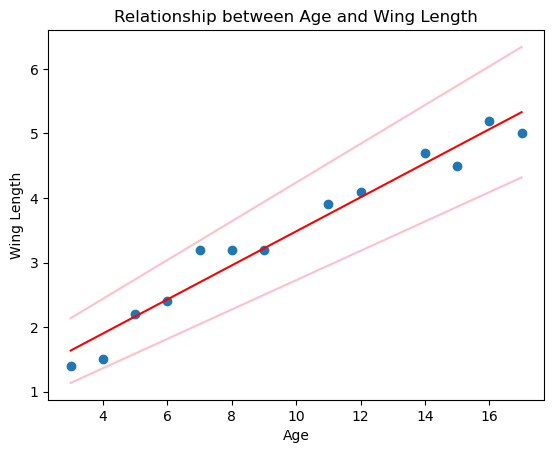

In [55]:
stderr_slope = results.stderr
stderr_intercept = results.intercept_stderr
print(stderr_intercept)
from scipy.stats import t
df = n-2
alpha = 0.05
t_critical = t.ppf(1 - alpha/2, df)

CI_slope_low = slope - t_critical*stderr_slope
CI_slope_high = slope + t_critical*stderr_slope

CI_intercept_low = intercept - t_critical*stderr_intercept
CI_intercept_high = intercept + t_critical*stderr_intercept

CI_low_pred = CI_slope_low*age + CI_intercept_low
CI_high_pred = CI_slope_high*age + CI_intercept_high

plt.scatter(age, wing_length)
plt.plot(age, wing_length_pred, color = 'r')
plt.plot(age, CI_low_pred, color = 'pink')
plt.plot(age, CI_high_pred, color = 'pink')
plt.title('Relationship between Age and Wing Length')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.show()

### 5. Calculate r^2 (the coefficient of determination)

In [61]:
coeff_det = (results.rvalue)**2
print(f'the coefficient of determination is {coeff_det:.3f}')

the coefficient of determination is 0.959


### 6. Calculate Pearson's r.

In [62]:
print(f'Pearsons r is {results.rvalue:.3f}')

Pearsons r is 0.979


### 7. Add some noise to the data and see how the regression changes.

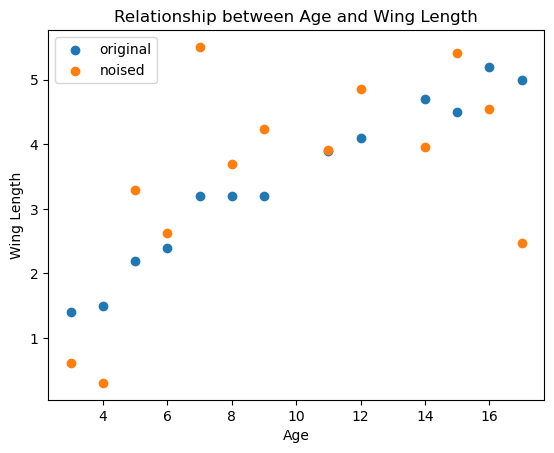

slope: 0.19
intercept: 1.68
do not reject null hypothesis
the coefficient of determination is 0.293
Pearsons r is 0.542


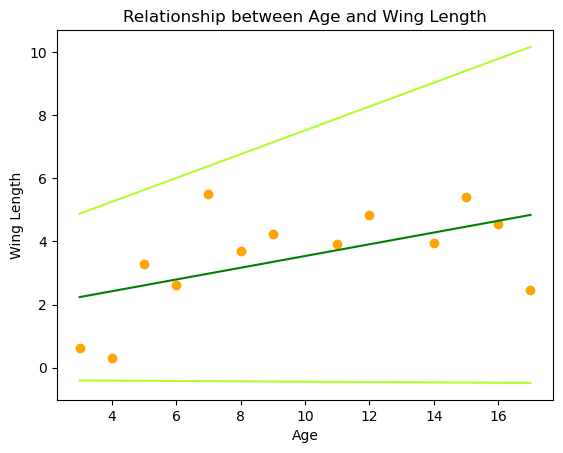

In [73]:
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.2, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

noise = np.random.normal(0,1, len(age))
wing_length_noised = wing_length + noise

plt.scatter(age, wing_length, label = 'original')
plt.scatter(age, wing_length_noised, label = 'noised')
plt.legend()
plt.title('Relationship between Age and Wing Length')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.show()

results_noised = st.linregress(age, wing_length_noised)

slope = results_noised.slope
intercept = results_noised.intercept
pvalue = results_noised.pvalue

wing_length_pred = slope*age + intercept

print(f'slope: {slope:.2f}')
print(f'intercept: {intercept:.2f}')
if pvalue < 0.05:
    print('reject null hypothesis')
else:
    print('do not reject null hypothesis')
coeff_det = (results_noised.rvalue)**2
print(f'the coefficient of determination is {coeff_det:.3f}')
print(f'Pearsons r is {results_noised.rvalue:.3f}')

stderr_slope = results_noised.stderr
stderr_intercept = results_noised.intercept_stderr

df = n-2
alpha = 0.05
t_critical = t.ppf(1 - alpha/2, df)

CI_slope_low = slope - t_critical*stderr_slope
CI_slope_high = slope + t_critical*stderr_slope

CI_intercept_low = intercept - t_critical*stderr_intercept
CI_intercept_high = intercept + t_critical*stderr_intercept

CI_low_pred = CI_slope_low*age + CI_intercept_low
CI_high_pred = CI_slope_high*age + CI_intercept_high

plt.scatter(age, wing_length_noised, color = 'orange')
plt.plot(age, wing_length_pred, color = 'g')
plt.plot(age, CI_low_pred, color = 'greenyellow')
plt.plot(age, CI_high_pred, color = 'greenyellow')
plt.title('Relationship between Age and Wing Length')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.show()